# Analysis

## Libraries

In [1]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer, OrdinalEncoder
from sklearn.impute import SimpleImputer

## Data Fetch

https://archive.ics.uci.edu/dataset/2/adult

In [2]:
# Load the dataset
file = '../data/raw/adult.data'
columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
    'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
    'hours_per_week', 'native_country', 'income'
]
df = pd.read_csv(file, names=columns, sep=',', skipinitialspace=True)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
adult = fetch_ucirepo(id=2)

X = adult.data.features
y = adult.data.targets

In [4]:
print(X.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dtype: object


In [5]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 24


In [6]:
unique_values = pd.DataFrame({col: [df[col].nunique()] for col in df.columns})
unique_values

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,73,9,21648,16,16,7,15,6,5,2,119,92,94,42,2


In [7]:
df = pd.concat([X, y], axis=1)
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


## Initial Exploration

In [8]:
unique_values = pd.DataFrame({
    "Column": df.columns,
    "Unique Values": [df[col].nunique() for col in df.columns]
})

print(unique_values)

            Column  Unique Values
0              age             74
1        workclass              9
2           fnlwgt          28523
3        education             16
4    education-num             16
5   marital-status              7
6       occupation             15
7     relationship              6
8             race              5
9              sex              2
10    capital-gain            123
11    capital-loss             99
12  hours-per-week             96
13  native-country             42
14          income              4


In [9]:
for col in df.columns:
    print(f"\n Column: {col}")
    print(df[col].unique())


 Column: age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]

 Column: workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]

 Column: fnlwgt
[ 77516  83311 215646 ... 173449  89686 350977]

 Column: education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

 Column: education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

 Column: marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

 Column: occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-mo

The specific values of each variable were explored to identify patterns, missing values, and possible transformations.

Results obtained:
- Age: Range from 17 to 90 years, typical adult population distribution
- Work class: Includes values such as '?' and NaN indicating missing data
- Education: 16 levels from 'Preschool' to 'Doctorate'
- Occupation: 15 categories including '?' and NaN
- Race: 5 main categories
- Sex: Only 2 values (Male/Female)

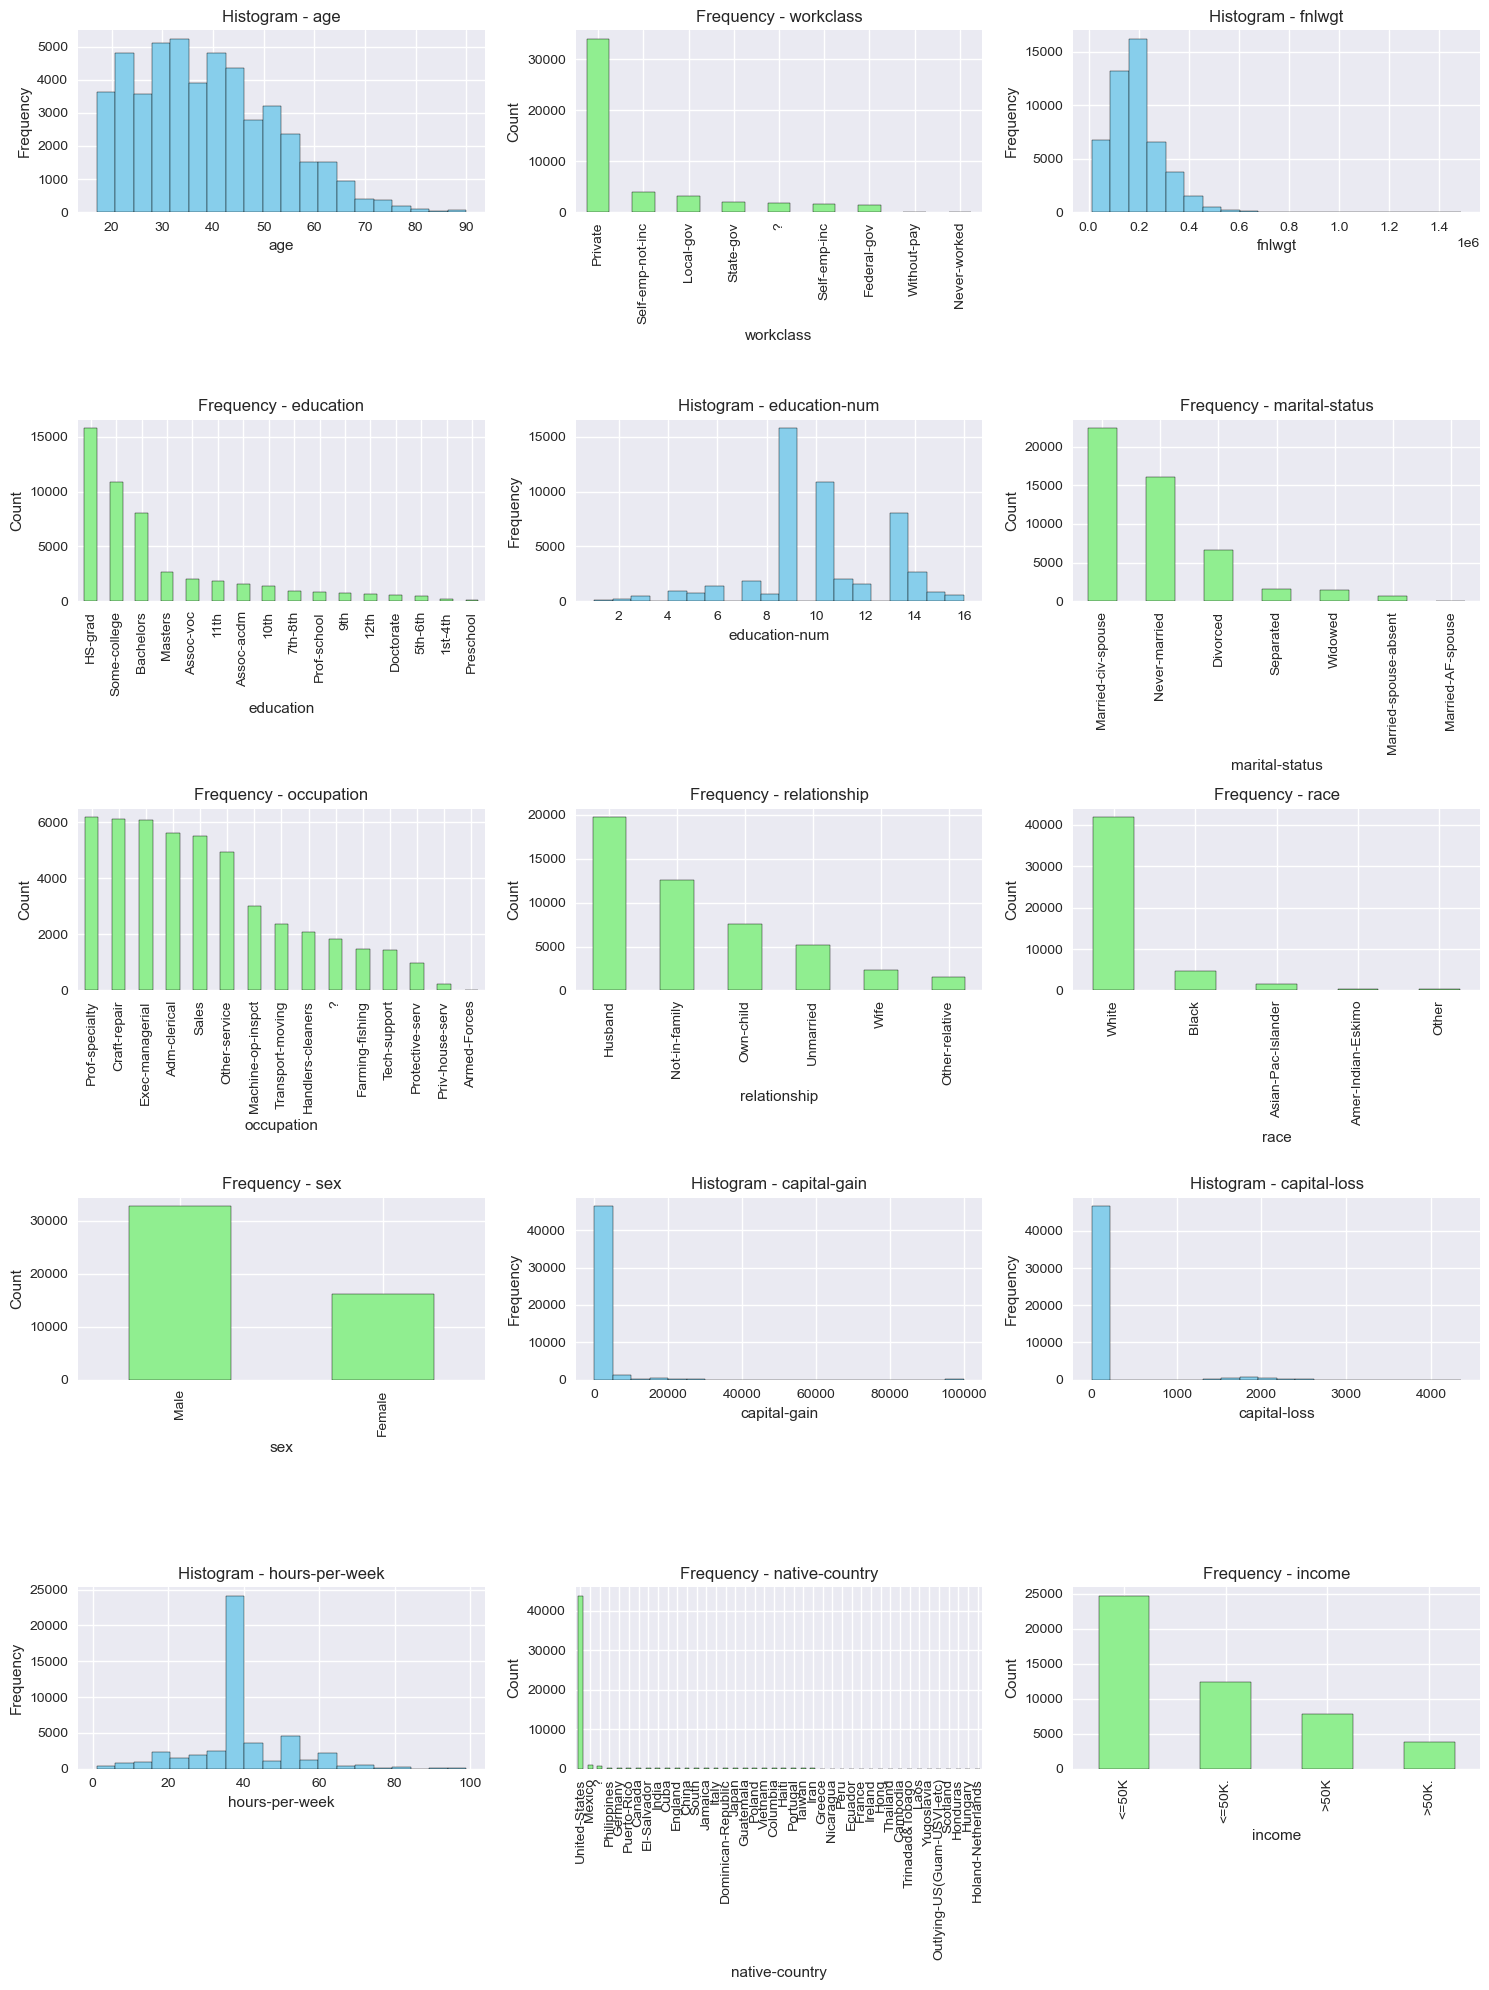

In [10]:
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(15, 20))


for i, col in enumerate(df.columns, 1):
    plt.subplot(5, 3, i) 
    
    if df[col].dtype in ['int64', 'float64']:
        plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Histogram - {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    
    else:
        df[col].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
        plt.title(f'Frequency - {col}')
        plt.xlabel(col)
        plt.ylabel('Count')

plt.tight_layout()
plt.show()

## Data Cleaning

### Duplicated Values

In [11]:
duplicated = df.duplicated().sum()
print(f"Number of duplicates: {duplicated}")

Number of duplicates: 29


29 duplicate records were identified that could bias the analysis and model training. This represents approximately 0.06% of the dataset, a low percentage but one that should be handled.

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
duplicados = df.duplicated().sum()
print(f"Number of duplicates: {duplicados}")

Number of duplicates: 0


It is confirmed that the removal of duplicates was successful before proceeding with the analysis.

### Null Values

In [14]:
print(df.isnull().sum())

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


In [15]:
for col in df.columns:
    print(f"\n Column: {col}")
    print(df[col].unique())


 Column: age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]

 Column: workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]

 Column: fnlwgt
[ 77516  83311 215646 ... 173449  89686 350977]

 Column: education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

 Column: education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

 Column: marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

 Column: occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-mo

In [16]:
columns_to_change = ['workclass', 'occupation', 'native-country']

for col in columns_to_change:
    df[col] = df[col].replace('?', 'Non-specific')
    df[col] = df[col].fillna('Non-specific')

The columns with missing data were identified: 'workclass', 'occupation', 'native-country'.

- workclass: 963 missing values (≈2%)
- occupation: 966 missing values (≈2%)
- native-country: 274 missing values (≈0.6%)

Missing data were labeled as 'Non-specific', and the value '?' was also treated as a type of missing value.

### Transformed Values

It is planned to consolidate similar categories to reduce dimensionality and improve model interpretability.

In [17]:
def plot_comparison(df, column, old_values, new_values, title="Comparison", figsize=(12, 5)):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    
    old_values.plot(kind='bar', ax=ax1, color='lightcoral')
    ax1.set_title(f'{title} - Before')
    ax1.set_ylabel('Count')
    ax1.tick_params(axis='x', rotation=45)

    new_values.plot(kind='bar', ax=ax2, color='lightblue')
    ax2.set_title(f'{title} - After')
    ax2.set_ylabel('Count')
    ax2.tick_params(axis='x', rotation=45)
    
    plt.suptitle(f'{title}: {column}', fontsize=16)
    plt.tight_layout()
    plt.show()

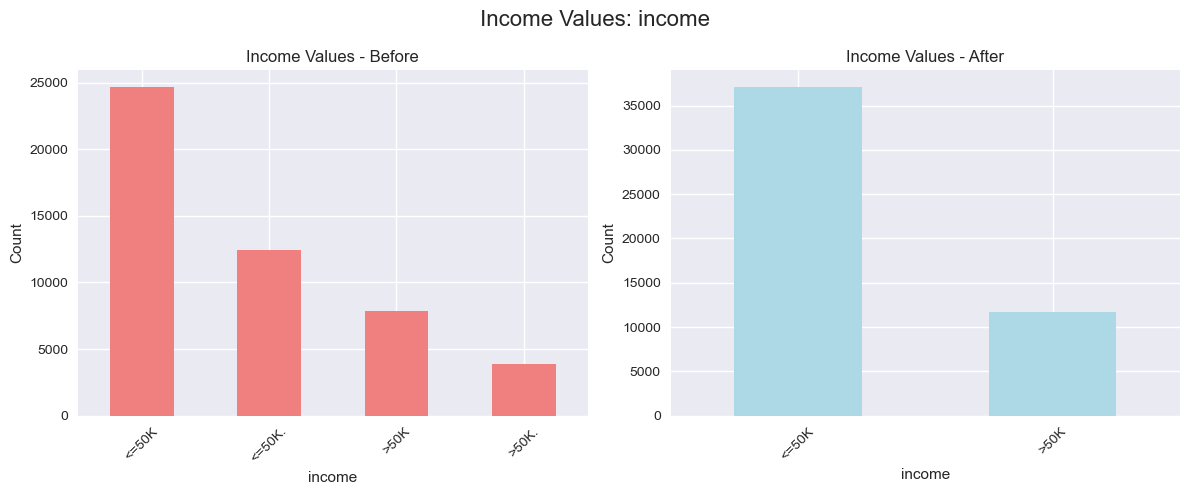

In [18]:
old_values = df['income'].value_counts()
df['income'] = df['income'].replace(['<=50K.', '>50K.'], ['<=50K', '>50K'])
new_values = df['income'].value_counts()

plot_comparison(df, 'income', old_values, new_values, "Income Values")

- Removal of inconsistent characters that could cause problems during encoding.
- Consistency in the target variable is prioritized to avoid errors during model training.

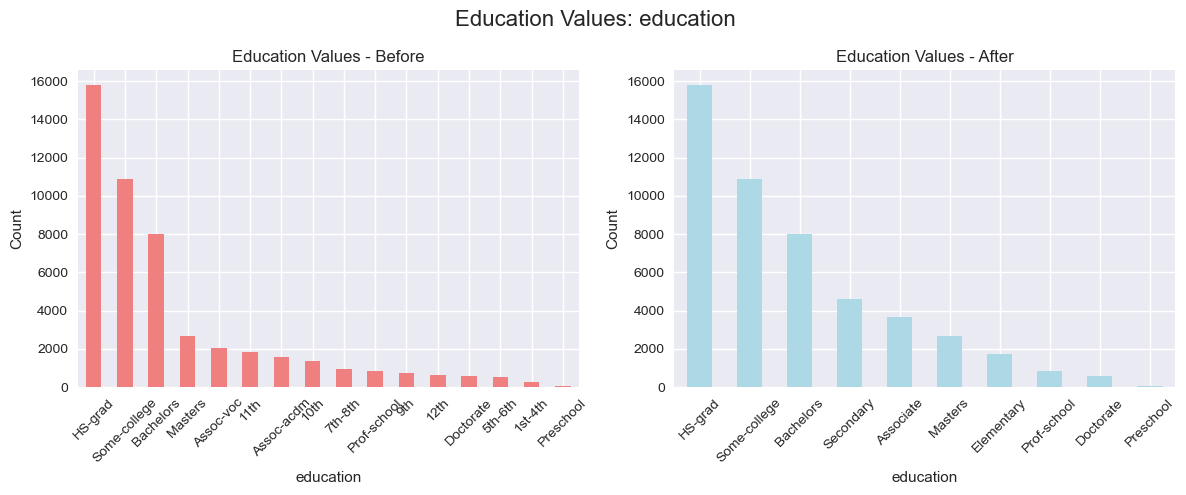

In [19]:
old_values = df['education'].value_counts()
df['education'] = df['education'].replace(['9th', '10th', '11th', '12th'], 'Secondary')
df['education'] = df['education'].replace(['1st-4th', '5th-6th', '7th-8th'], 'Elementary')
df['education'] = df['education'].replace(['Assoc-voc', 'Assoc-acdm'], 'Associate')
new_values = df['education'].value_counts()

plot_comparison(df, 'education', old_values, new_values, "Education Values")

- There were 16 individual levels from 'Preschool' to 'Doctorate'.
- Grouping of similar levels (10 levels) to reduce noise and improve generalization.
- This results in a more manageable categorical variable and less prone to overfitting.

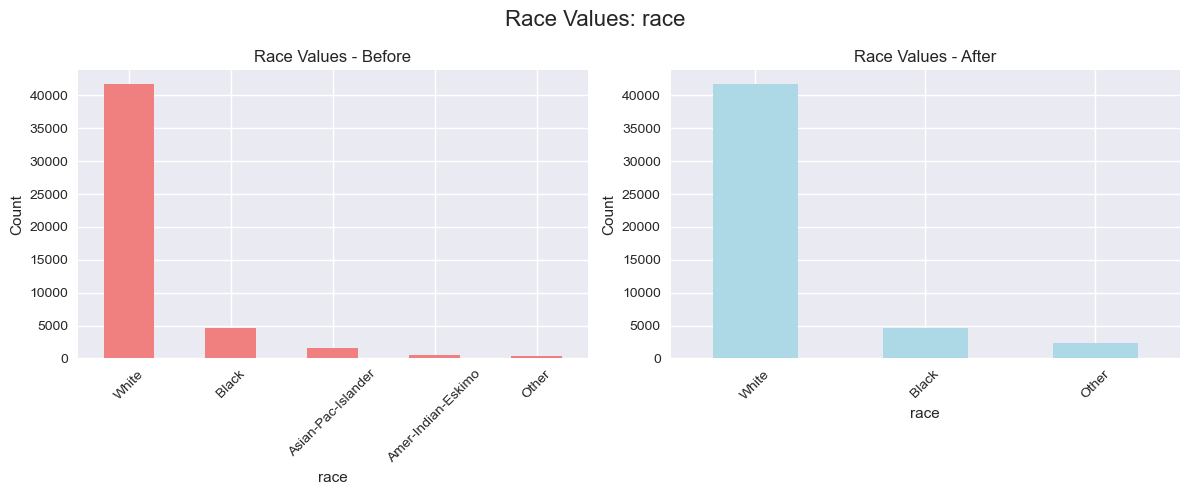

In [20]:
old_values = df['race'].value_counts()
df['race'] = df['race'].replace(['Amer-Indian-Eskimo', 'Asian-Pac-Islander'], 'Other')
new_values = df['race'].value_counts()

plot_comparison(df, 'race', old_values, new_values, "Race Values")

- There were 5 race categories, where 2 are too specific to represent a significant group.
- Grouping of categories with very few samples to avoid overfitting.
- Reduced from 5 to 3 categories, keeping the most relevant racial distinctions.

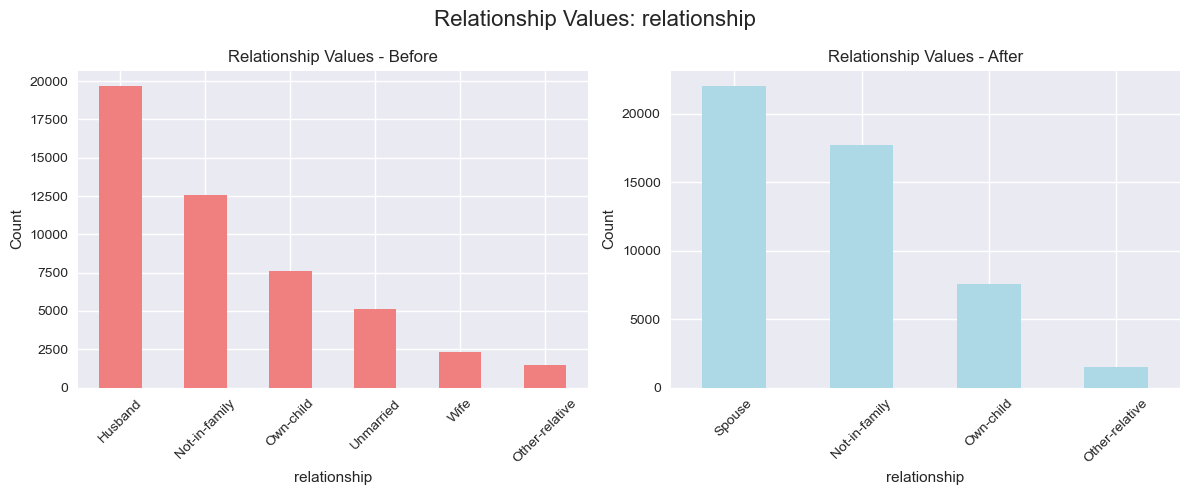

In [21]:
old_values = df['relationship'].value_counts()
df['relationship'] = df['relationship'].replace(['Husband', 'Wife'], 'Spouse')
df['relationship'] = df['relationship'].replace('Unmarried', 'Not-in-family')
new_values = df['relationship'].value_counts()

plot_comparison(df, 'relationship', old_values, new_values, "Relationship Values")

- 'Husband' and 'Wife' were grouped into 'Spouse' to reduce dimensionality.
- Reduced from 6 to 4 categories, maintaining relevant semantic information, as the unified case was only a gender distinction.

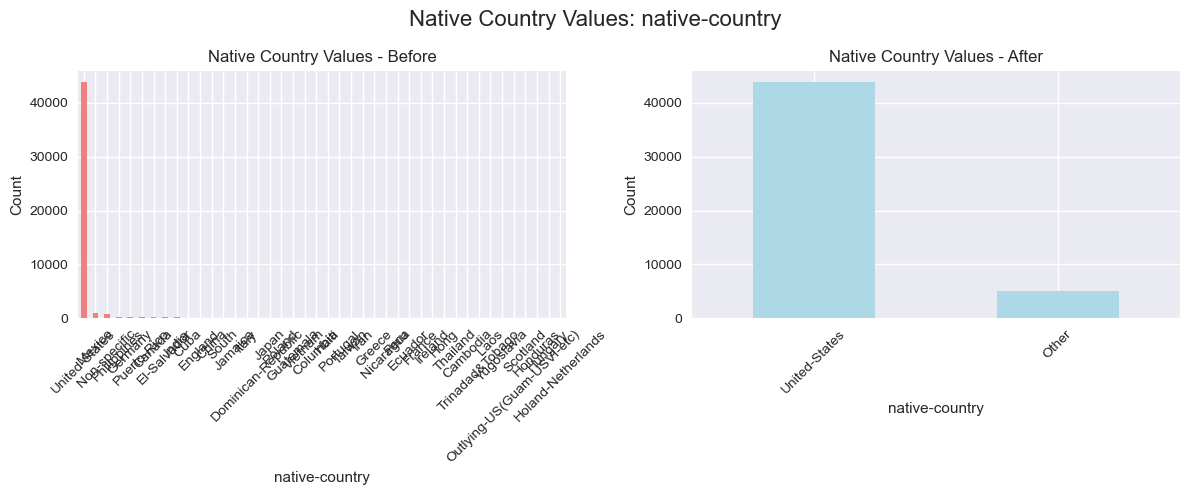

In [22]:
old_values = df['native-country'].value_counts()
df['native-country'] = df['native-country'].apply(lambda x: 'Other' if x != 'United-States' else x)
new_values = df['native-country'].value_counts()

plot_comparison(df, 'native-country', old_values, new_values, "Native Country Values")

- 42 unique values that would create many dummy columns after One-Hot Encoding.
- There is a severe imbalance because 'United-States' likely represents >80% of the data.
- There is little predictive variability, as most countries have very few samples.
- Grouping of countries other than 'United States'.

### Summary of Transformations

- Income: The values '<=50K.' and '>50K.' were standardized by removing periods.
- Education: Similar educational levels were grouped:
    - 'Elementary' (1st-4th, 5th-6th, 7th-8th)
    - 'Secondary' (9th, 10th, 11th, 12th)
    - 'Associate' (Assoc-voc, Assoc-acdm)
- Race: 'Amer-Indian-Eskimo' and 'Asian-Pac-Islander' were consolidated into 'Other'
- Relationship: 'Husband' and 'Wife' were simplified to 'Spouse'
- Native Country: Any country other than 'United States' was grouped as 'Other'

## Variable Analysis

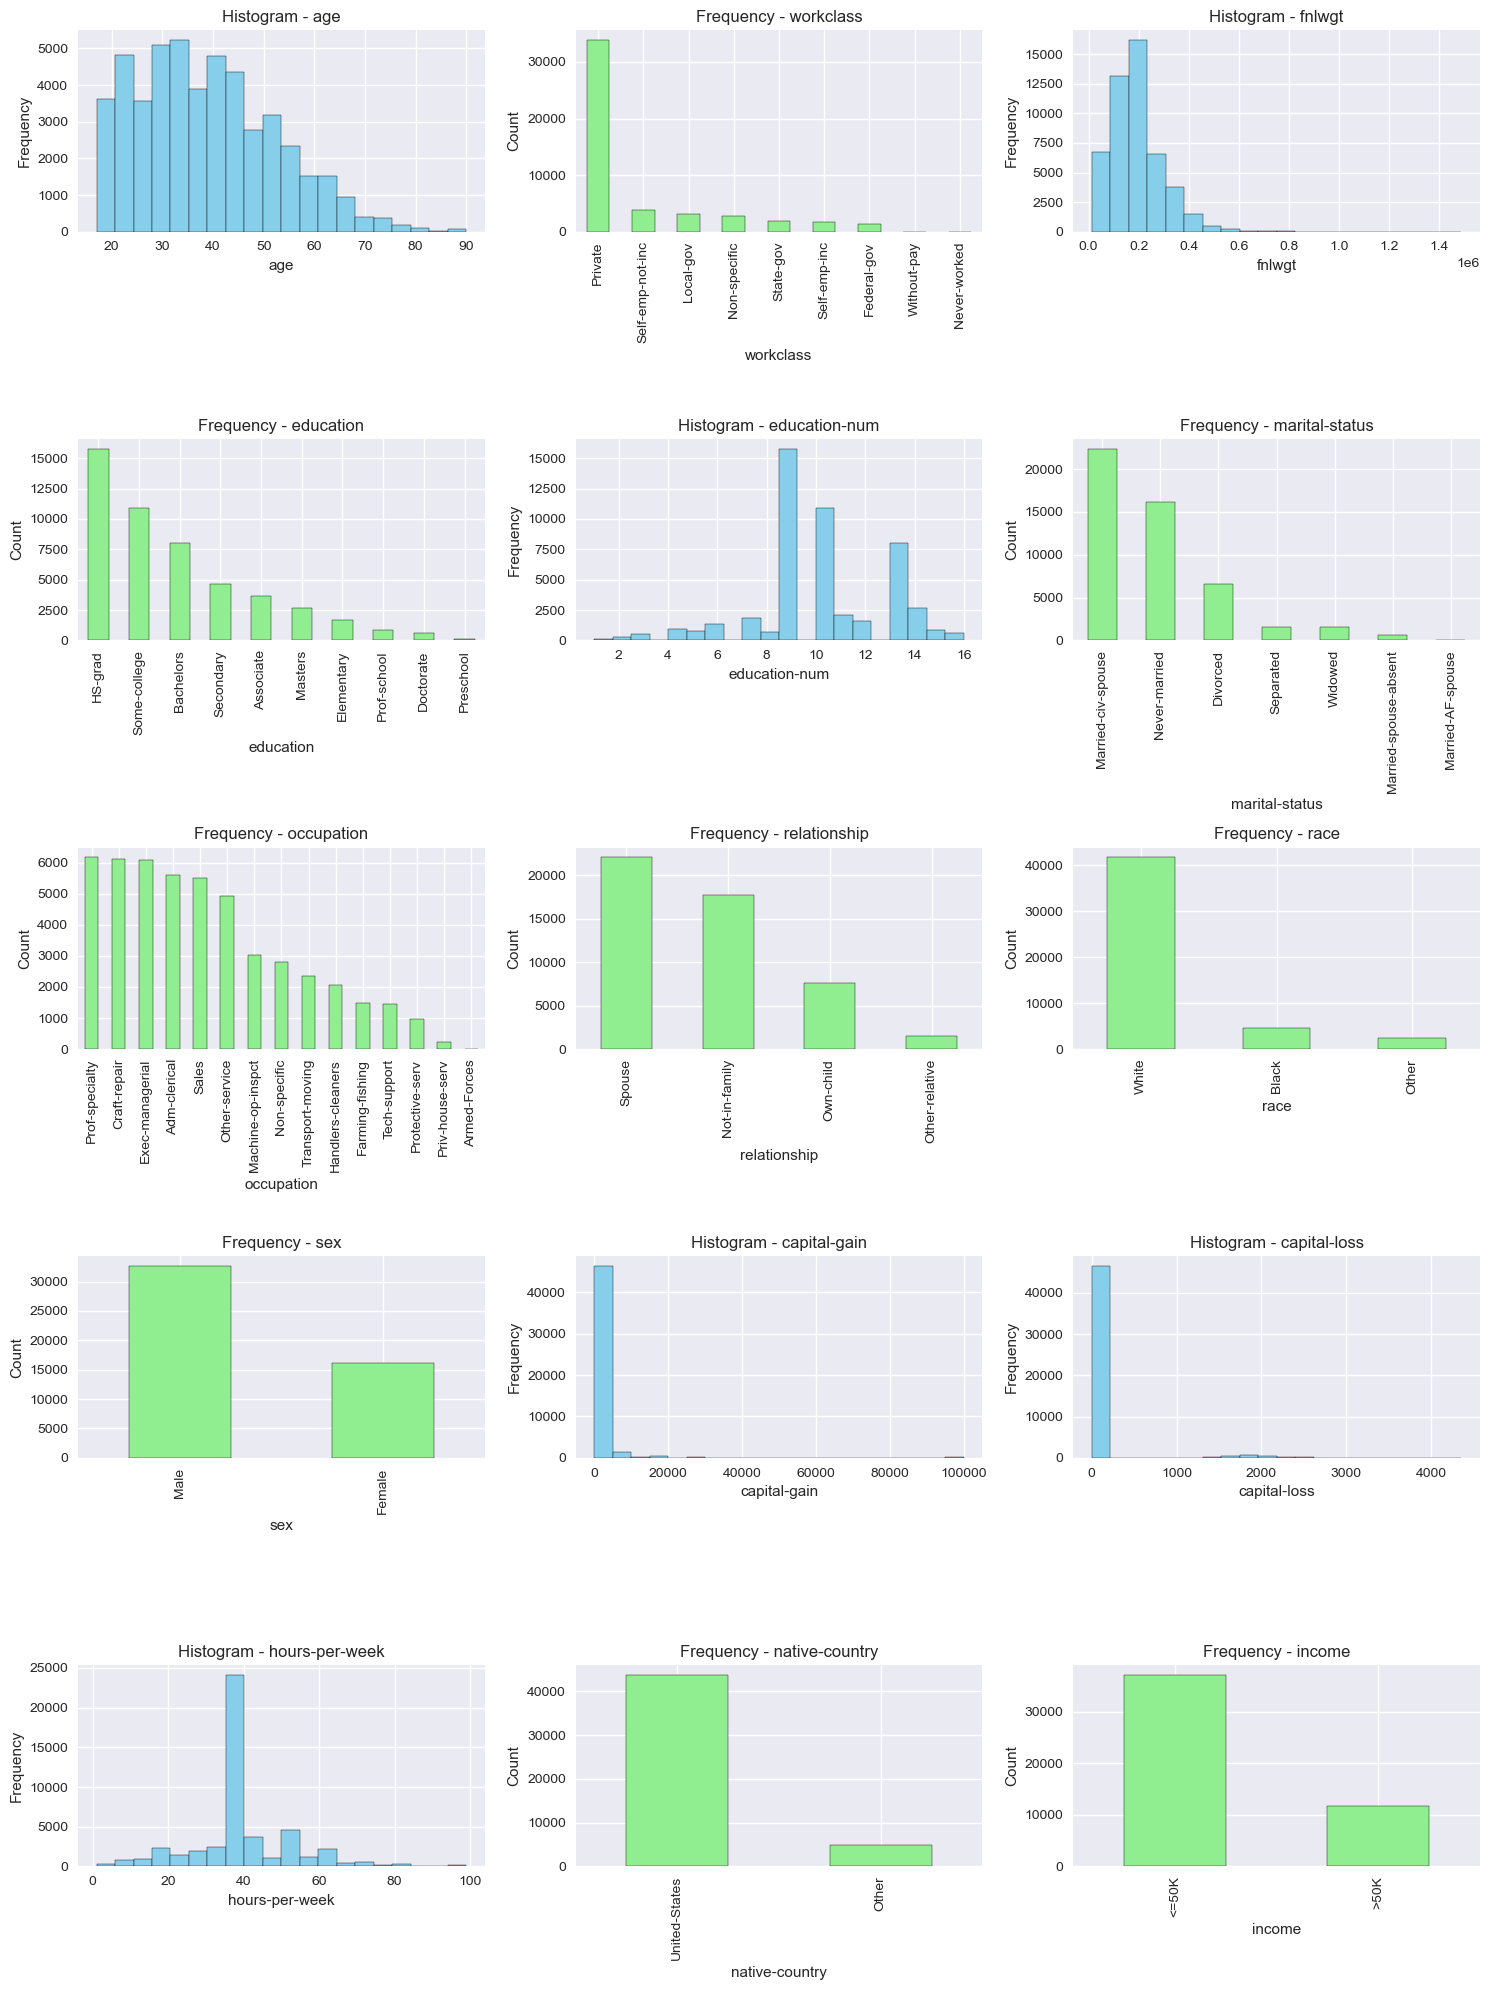

In [23]:
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(15, 20))


for i, col in enumerate(df.columns, 1):
    plt.subplot(5, 3, i) 
    
    if df[col].dtype in ['int64', 'float64']:
        plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Histogram - {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')

    else:  # categóricas
        df[col].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
        plt.title(f'Frequency - {col}')
        plt.xlabel(col)
        plt.ylabel('Count')

plt.tight_layout()
plt.show()


### Variables to Omit

1. fnlwgt

    - 28,523 unique values in a dataset of about 48,000 records, this is a census sampling weight, not a real predictive feature.
    - Represents the frequency of observation in the population, not information about the individual.

2. education

    - Perfect redundancy with education-num, since education-num is the ordinal numeric version (1-16) which is more useful for the model.
    - Duplicate categorical variables increase dimensionality without providing additional information.

In [24]:
df = df.drop(columns=['fnlwgt', 'education'])

In [25]:
for col in df.columns:
    print(f"\n Column: {col}")
    print(df[col].unique())


 Column: age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]

 Column: workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Non-specific' 'Self-emp-inc' 'Without-pay' 'Never-worked']

 Column: education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

 Column: marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

 Column: occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Non-specific'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

 Column: relationship
['Not-in-family' 'Spouse' 'Own-child' 'Other-relative']

 Column: race
['White' 'Black' 'Other']



## Preprocessing

In [26]:
numeric_features = ["age", "education-num", "hours-per-week"]
skewed_features = ["capital-gain", "capital-loss"]
categorical_features = ["workclass", "marital-status", "occupation", "relationship", "race", "sex", "native-country"]

In [27]:
target = "income"
df[target] = df[target].map({"<=50K": 0, ">50K": 1})

Since the target variable 'income' is binary, it is simply mapped as 0 and 1, for the values "<=50K" and ">50K", respectively.

In [28]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
])

log_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("log", FunctionTransformer(func=np.log1p, validate=False)),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore"))
])

Pipeline numeric_transformer:
1. Missing values are filled with the column median (protocol).

Pipeline log_transformer:
1. Missing values are filled with the median (protocol).
2. The natural logarithm + 1 is applied to the data.
3. Standardization is applied after the log transformation.

Pipeline categorical_transformer:
1. Missing values are filled with the mode (protocol).
2. Categories are converted into dummy columns for robustness.

In [29]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("log_num", log_transformer, skewed_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

The three created pipelines are connected, each applied to their corresponding variables.

In [30]:
X = df.drop(columns=[target])
y = df[target]

In [31]:
X_processed = preprocessor.fit_transform(X)

In [32]:
ohe_cols = preprocessor.named_transformers_["cat"]["onehot"].get_feature_names_out(categorical_features)

In [33]:
processed_df = pd.DataFrame(
    np.hstack([X_processed.toarray() if hasattr(X_processed, "toarray") else X_processed]),
    columns=(
        numeric_features +
        skewed_features +
        list(ohe_cols)
    )
)

In [34]:
processed_df[target] = y.values

Construction of the final dataframe, with the transformed variables and the target variable.

In [35]:
processed_df

,age,education-num,hours-per-week,capital-gain,capital-loss,workclass_Local-gov,workclass_Never-worked,workclass_Non-specific,workclass_Private,workclass_Self-emp-inc,...,occupation_Tech-support,occupation_Transport-moving,relationship_Other-relative,relationship_Own-child,relationship_Spouse,race_Other,race_White,sex_Male,native-country_United-States,income
0,39.0,13.0,40.0,2.843612,-0.221333,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0
1,50.0,13.0,13.0,-0.298014,-0.221333,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0
2,38.0,9.0,40.0,-0.298014,-0.221333,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0
3,53.0,7.0,40.0,-0.298014,-0.221333,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0
4,28.0,13.0,40.0,-0.298014,-0.221333,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48808,39.0,13.0,36.0,-0.298014,-0.221333,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
48809,64.0,9.0,40.0,-0.298014,-0.221333,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0
48810,38.0,13.0,50.0,-0.298014,-0.221333,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0
48811,44.0,13.0,40.0,3.219591,-0.221333,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0


In [36]:
processed_df.to_csv('../data/processed/adult.data', index=False)